## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
import random
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Combine the data into a single dataset
merged_mouse_df = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Check the number of mice.
total_unique_mice = len(merged_mouse_df["Mouse ID"].unique())
print(total_unique_mice)

count = merged_mouse_df["Mouse ID"].count()
count

249


1893

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Select all duplicate rows based on multiple column names in list
duplicate_mice = merged_mouse_df[merged_mouse_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice1 = merged_mouse_df[merged_mouse_df.duplicated(['Mouse ID', 'Timepoint'], keep = 'last')]
duplicate_mice1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merged_mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint']).reset_index(drop=True)
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Check the number of mice in the clean DataFrame.
count_cleaned = clean_mouse_df["Mouse ID"].count()
count_cleaned

1888

## Summary Statistics

In [8]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_vol_mean = round(clean_mouse_df['Tumor Volume (mm3)'].mean(),4)
tumor_vol_median = round(clean_mouse_df['Tumor Volume (mm3)'].median(),4)
tumor_vol_std = round(clean_mouse_df['Tumor Volume (mm3)'].std(),4)
tumor_vol_sem = round(sem(clean_mouse_df['Tumor Volume (mm3)']),4)

print(tumor_vol_mean)
print(tumor_vol_median)
print(tumor_vol_std)
print(tumor_vol_sem)

summary_df = pd.DataFrame({"Tumor Volume (mm3) mean": [tumor_vol_mean],
                              "Tumor Volume (mm3) median": tumor_vol_median,
                              "Tumor Volume std": tumor_vol_std,
                              "Tumor Volume SEM": tumor_vol_sem})

summary_df


50.4493
48.9514
8.9046
0.2049


,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume std,Tumor Volume SEM
0,50.4493,48.9514,8.9046,0.2049


In [9]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)


## Bar and Pie Charts

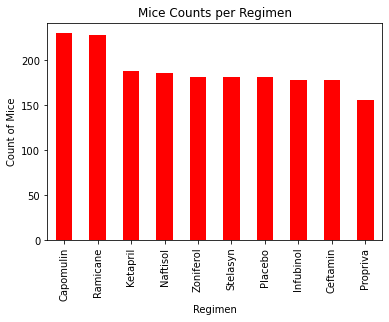

<Figure size 432x288 with 0 Axes>

In [10]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot
regimen_cnt = clean_mouse_df["Drug Regimen"].value_counts()
regimen_cnt.plot(kind="bar", facecolor="red")

# Set textual properties
plt.title("Mice Counts per Regimen")
plt.ylabel("Count of Mice")
plt.xlabel("Regimen")

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()

In [11]:
reg_list = pd.DataFrame(regimen_cnt)
new_ind_reg_list = reg_list.reset_index(drop=False)
new_ind_reg_list = new_ind_reg_list.rename(
    columns={"Drug Regimen": "Mice Count", "index": "Drug Regimen"})
new_ind_reg_list

,Drug Regimen,Mice Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,156


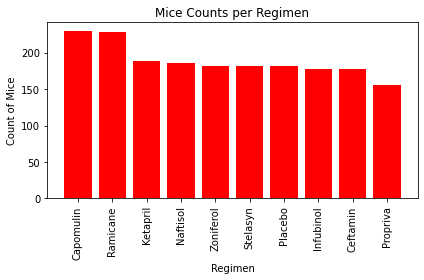

In [12]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

# Set x axis and tick locations
x_axis = np.arange(len(new_ind_reg_list))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, new_ind_reg_list["Mice Count"], facecolor="red", alpha=1.0, align="center")
plt.xticks(tick_locations, new_ind_reg_list["Drug Regimen"], rotation="vertical")

# Set textual properties
plt.title("Mice Counts per Regimen")
plt.ylabel("Count of Mice")
plt.xlabel("Regimen")

plt.tight_layout()

plt.show()

In [13]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
filtered_df = clean_mouse_df[["Sex", "Mouse ID"]]
filtered_df.head()

grouped_by_gender = filtered_df.groupby(["Sex"])
grouped_gender_df = grouped_by_gender["Mouse ID"].count()

gender_cnts_df = pd.DataFrame({"Count": grouped_gender_df})

# place gender keys for the percents
gender_list = gender_cnts_df.keys()

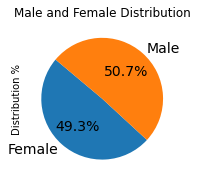

In [14]:
ax1 = plt.subplot(121, aspect='equal')
sex_pie = gender_cnts_df.plot(kind="pie", y=gender_list[0], ax=ax1, autopct='%1.1f%%', 
 startangle=140, shadow=False, legend = False, fontsize=14, title=("Male and Female Distribution"))
sex_pie.set_ylabel("Distribution %")

plt.show()

In [15]:
# The index can be reset to provide index numbers based on the new rankings.
new_index_df = gender_cnts_df.reset_index(drop=False)

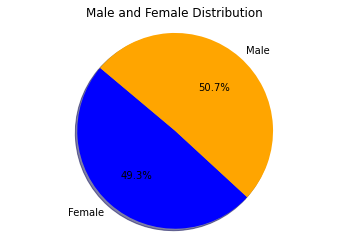

In [16]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(new_index_df["Count"], labels=new_index_df["Sex"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


# Tells matplotlib that we want a pie chart with equal axes (if starts to look like an oval)
plt.title('Male and Female Distribution')
plt.axis('equal')
plt.show()



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin") | 
                              (clean_mouse_df["Drug Regimen"] == "Ramicane") | 
                              (clean_mouse_df["Drug Regimen"] == "Infubinol") | 
                              (clean_mouse_df["Drug Regimen"] == "Ceftamin") , :]


# print(regimens)

regimens_df = pd.DataFrame(regimens)
# regimens_df

filtered_regimens_df = regimens_df[["Mouse ID", "Drug Regimen", "Timepoint"]]

groups = filtered_regimens_df.groupby(["Mouse ID", "Drug Regimen"])

grouped_max = groups["Timepoint"].max()
grouped_max_df = pd.DataFrame(grouped_max)
grouped_max_df

# Start by getting the last (latest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(grouped_max_df, clean_mouse_df,  how='inner', left_on=["Mouse ID", "Drug Regimen", "Timepoint"], 
                  right_on = ["Mouse ID", "Drug Regimen", "Timepoint"])

new_df.head()

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a275,Ceftamin,45,Female,20,28,62.999356,3
3,a411,Ramicane,45,Male,3,22,38.407618,1
4,a444,Ramicane,45,Female,10,25,43.047543,0


In [18]:
# create tables for each drug
capomulin_df = new_df.loc[(new_df["Drug Regimen"] == "Capomulin"), :]
ramicane_df = new_df.loc[(new_df["Drug Regimen"] == "Ramicane"), :]
infubinol_df = new_df.loc[(new_df["Drug Regimen"] == "Infubinol"), :]
ceftamin_df = new_df.loc[(new_df["Drug Regimen"] == "Ceftamin"), :]

capomulin_list = capomulin_df["Tumor Volume (mm3)"].tolist()
ramicane_list = ramicane_df["Tumor Volume (mm3)"].tolist()
infubinol_list = infubinol_df["Tumor Volume (mm3)"].tolist()
ceftamin_list = ceftamin_df["Tumor Volume (mm3)"].tolist()

print(capomulin_list)
print(ramicane_list)
print(infubinol_list)
print(ceftamin_list)

[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.125164399999996, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.896238399999998]
[38.407618299999996, 43.04754260000001, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]
[67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.321345799999996, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.

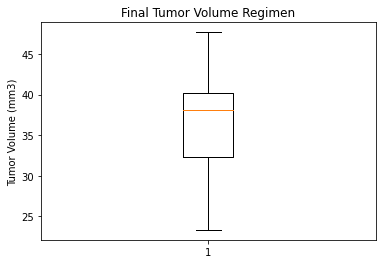

In [19]:

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_list)
plt.show()


In [22]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
drug_regimen = new_df["Drug Regimen"].tolist()
drug_regimen
# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    for x in unique_list: 
        print(unique_list),
        
# driver code 
list1 = drug_regimen
print("the unique values from 1st list is") 
unique(list1) 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = [] 

for drug in unique_list:
    if new_df["Drug Regimen"] == drug
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: invalid syntax (<ipython-input-22-6643e44784d0>, line 29)

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Example outlier plot of reaction times
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times)
# plt.show()



a1=capomulin_df[['Drug Regimen','Tumor Volume (mm3)']]
ax = a1.boxplot(by='Tumor Volume (mm3)', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False, return_type='axes')
a2 = ramicane_df[['Drug Regimen','Tumor Volume (mm3)']]
a2.boxplot(by='Tumor Volume (mm3)', meanline=True, showmeans=True, showcaps=True, 
           showbox=True, showfliers=False, ax=ax)

ValueError: Number of columns must be > 0, not 0

<Figure size 432x288 with 0 Axes>

## Line and Scatter Plots

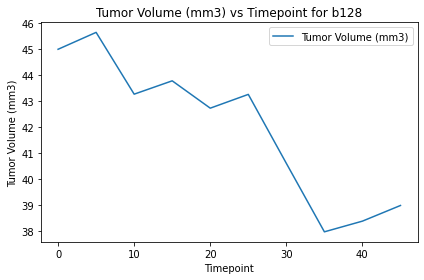

In [23]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
one_mouse_df = clean_mouse_df.loc[(clean_mouse_df["Mouse ID"] == "b128"), :]
one_mouse_df.head()

lines = one_mouse_df.plot.line(x ='Timepoint', y = 'Tumor Volume (mm3)')

plt.title("Tumor Volume (mm3) vs Timepoint for b128")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

plt.tight_layout()

plt.show()

In [24]:
# clean_mouse_df.head(50)
capomulin1_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin"), :]
weight_df = capomulin1_df[["Mouse ID", "Weight (g)"]]
# weight_df.head()

clean_weight_df = weight_df.drop_duplicates(subset=['Mouse ID', 'Weight (g)']).reset_index(drop=True)
# clean_weight_df

weight_tumor = capomulin1_df[["Mouse ID", 'Tumor Volume (mm3)']]
# weight_tumor.head()

grouped_by_mouse = weight_tumor.groupby(["Mouse ID"])

tumor_avg = grouped_by_mouse["Tumor Volume (mm3)"].mean()
# tumor_avg
 
scatter_plt_mouse = pd.DataFrame({"Average Tumor Volume": tumor_avg})
# scatter_plt_mouse

merged_wght_vs_tumor_df = pd.merge(clean_weight_df, scatter_plt_mouse, how="inner", on=["Mouse ID", "Mouse ID"])
merged_wght_vs_tumor_df.head()

,Mouse ID,Weight (g),Average Tumor Volume
0,s185,17,34.559143
1,x401,15,36.182040
2,m601,17,34.847470
3,f966,17,36.505973
4,u364,17,39.887495


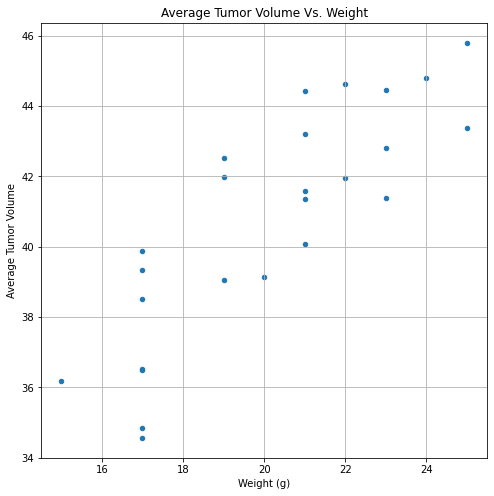

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 

merged_wght_vs_tumor_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(8,8),
              title="Average Tumor Volume Vs. Weight")
plt.show()


## Correlation and Regression

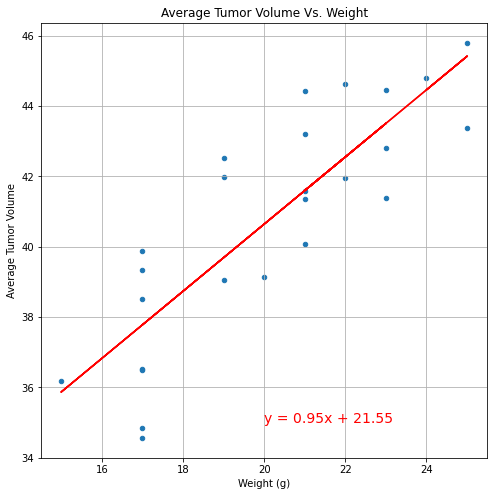

The correlation between both factors is 0.84


In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.

x_values = merged_wght_vs_tumor_df['Weight (g)']
y_values = merged_wght_vs_tumor_df['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
merged_wght_vs_tumor_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(8,8),
              title="Average Tumor Volume Vs. Weight")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=14,color="red")
plt.plot(x_values,regress_values,"r-")
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")